<a href="https://colab.research.google.com/github/tantiboro/vaki/blob/main/Copy_of_Untitled.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import the Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

In [ ]:
#df = pd.read_csv('/content/drive/MyDrive/New Folder/loans_lenders.csv')

In [ ]:
#df.isnull().sum()

In [ ]:
#df.info()

In [ ]:
#loading the dataset
df = pd.read_csv('/content/drive/MyDrive/New Folder/loans.csv')

In [ ]:
# How many columns and rows are they in the dataset
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset has 2086700 rows and 34 columns.


In [ ]:
print(f'The columns of the dataset are: {df.columns.to_list()}')

The columns of the dataset are: ['LOAN_ID', 'LOAN_NAME', 'ORIGINAL_LANGUAGE', 'DESCRIPTION', 'DESCRIPTION_TRANSLATED', 'FUNDED_AMOUNT', 'LOAN_AMOUNT', 'STATUS', 'IMAGE_ID', 'VIDEO_ID', 'ACTIVITY_NAME', 'SECTOR_NAME', 'LOAN_USE', 'COUNTRY_CODE', 'COUNTRY_NAME', 'TOWN_NAME', 'CURRENCY_POLICY', 'CURRENCY_EXCHANGE_COVERAGE_RATE', 'CURRENCY', 'PARTNER_ID', 'POSTED_TIME', 'PLANNED_EXPIRATION_TIME', 'DISBURSE_TIME', 'RAISED_TIME', 'LENDER_TERM', 'NUM_LENDERS_TOTAL', 'NUM_JOURNAL_ENTRIES', 'NUM_BULK_ENTRIES', 'TAGS', 'BORROWER_NAMES', 'BORROWER_GENDERS', 'BORROWER_PICTURED', 'REPAYMENT_INTERVAL', 'DISTRIBUTION_MODEL']


In [ ]:
# How many NaN are in the dataframe
df.isnull().sum()

LOAN_ID                                  0
LOAN_NAME                            50238
ORIGINAL_LANGUAGE                    45891
DESCRIPTION                          45926
DESCRIPTION_TRANSLATED              455312
FUNDED_AMOUNT                            0
LOAN_AMOUNT                              0
STATUS                                   0
IMAGE_ID                             45891
VIDEO_ID                           2085522
ACTIVITY_NAME                            0
SECTOR_NAME                              0
LOAN_USE                             45914
COUNTRY_CODE                            34
COUNTRY_NAME                             0
TOWN_NAME                           176345
CURRENCY_POLICY                          0
CURRENCY_EXCHANGE_COVERAGE_RATE     473453
CURRENCY                                 0
PARTNER_ID                           21173
POSTED_TIME                              0
PLANNED_EXPIRATION_TIME             371834
DISBURSE_TIME                         4013
RAISED_TIME

In [ ]:
# Dropping columns with more than 100k missing values and only informative data
df1 = df.drop(columns = ['VIDEO_ID', 'CURRENCY_EXCHANGE_COVERAGE_RATE', 'TOWN_NAME', 'PLANNED_EXPIRATION_TIME', 'RAISED_TIME', 'TAGS', 'IMAGE_ID', 'PARTNER_ID', 'LOAN_NAME', 'ORIGINAL_LANGUAGE', 'BORROWER_NAMES', 'BORROWER_PICTURED', 'DISBURSE_TIME', 'DESCRIPTION'], axis=1)

In [ ]:
df1.isnull().sum()

LOAN_ID                        0
DESCRIPTION_TRANSLATED    455312
FUNDED_AMOUNT                  0
LOAN_AMOUNT                    0
STATUS                         0
ACTIVITY_NAME                  0
SECTOR_NAME                    0
LOAN_USE                   45914
COUNTRY_CODE                  34
COUNTRY_NAME                   0
CURRENCY_POLICY                0
CURRENCY                       0
POSTED_TIME                    0
LENDER_TERM                   24
NUM_LENDERS_TOTAL              0
NUM_JOURNAL_ENTRIES            0
NUM_BULK_ENTRIES               0
BORROWER_GENDERS           45891
REPAYMENT_INTERVAL             0
DISTRIBUTION_MODEL             0
dtype: int64

In [ ]:
df1['STATUS'].value_counts()

funded         1977543
expired          92411
refunded          9182
fundRaising       7564
Name: STATUS, dtype: int64

In [ ]:
#Dropping the NaN
df1 = df1.dropna()

In [ ]:
print(f'The dataset has {df1.shape[0]} rows and {df1.shape[1]} columns.')

The dataset has 1631345 rows and 20 columns.


In [ ]:
df1.isnull().sum()

LOAN_ID                   0
DESCRIPTION_TRANSLATED    0
FUNDED_AMOUNT             0
LOAN_AMOUNT               0
STATUS                    0
ACTIVITY_NAME             0
SECTOR_NAME               0
LOAN_USE                  0
COUNTRY_CODE              0
COUNTRY_NAME              0
CURRENCY_POLICY           0
CURRENCY                  0
POSTED_TIME               0
LENDER_TERM               0
NUM_LENDERS_TOTAL         0
NUM_JOURNAL_ENTRIES       0
NUM_BULK_ENTRIES          0
BORROWER_GENDERS          0
REPAYMENT_INTERVAL        0
DISTRIBUTION_MODEL        0
dtype: int64

In [ ]:
#Check the status of all the loans
df1['STATUS'].value_counts()

funded         1537175
expired          86606
fundRaising       7564
Name: STATUS, dtype: int64

In [ ]:
# Drop the loans that are still on fundraising stage
data = df1.loc[df1['STATUS'] != 'fundRaising']
data.head()

,LOAN_ID,DESCRIPTION_TRANSLATED,FUNDED_AMOUNT,LOAN_AMOUNT,STATUS,ACTIVITY_NAME,SECTOR_NAME,LOAN_USE,COUNTRY_CODE,COUNTRY_NAME,CURRENCY_POLICY,CURRENCY,POSTED_TIME,LENDER_TERM,NUM_LENDERS_TOTAL,NUM_JOURNAL_ENTRIES,NUM_BULK_ENTRIES,BORROWER_GENDERS,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL
1,932948,Rosa works hard to support her family. Rosa is...,125.0,125.0,funded,General Store,Retail,to buy more groceries to sell in her general s...,PH,Philippines,shared,PHP,2015-08-16 14:03:48.000 +0000,8.0,5,1,1,female,monthly,field_partner
2,1159746,Warlita is a widowed woman with two children. ...,175.0,175.0,funded,Fruits & Vegetables,Food,to buy more bananas to sell and other supplies...,PH,Philippines,shared,PHP,2016-09-28 13:37:22.000 +0000,11.0,7,1,1,female,monthly,field_partner
3,1396016,Faafofola is a 40-year-old married woman with ...,1400.0,1400.0,funded,Farming,Agriculture,"to buy more taro roots (seedlings), more banan...",WS,Samoa,shared,WST,2017-10-16 02:59:44.000 +0000,14.0,34,1,1,female,monthly,field_partner
4,521395,"Veronique is a widow, …[text missing] years ol...",425.0,425.0,funded,Liquor Store / Off-License,Food,to increase her stock of various brands of be...,CM,Cameroon,shared,XAF,2013-01-25 10:57:20.000 +0000,15.0,17,1,1,female,monthly,field_partner
5,1539010,Sabitu is married and lives with his family in...,325.0,325.0,funded,Farming,Agriculture,to buy fertilizers and seeds to get a good yie...,NG,Nigeria,shared,NGN,2018-05-28 12:29:28.000 +0000,19.0,11,1,1,male,bullet,field_partner


In [ ]:
# Checking again the status of the remaining loans
data['STATUS'].value_counts()

funded     1537175
expired      86606
Name: STATUS, dtype: int64

In [ ]:
# # combining funded and refunded under the same category
# data['loan_status'] = data.apply(lambda x: 'funded' if x.STATUS == 'refunded' else x.STATUS, axis=1)

In [ ]:
# How many NaN are in the dataframe
#data.isnull().sum()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1623781 entries, 1 to 2086699
Data columns (total 20 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   LOAN_ID                 1623781 non-null  int64  
 1   DESCRIPTION_TRANSLATED  1623781 non-null  object 
 2   FUNDED_AMOUNT           1623781 non-null  float64
 3   LOAN_AMOUNT             1623781 non-null  float64
 4   STATUS                  1623781 non-null  object 
 5   ACTIVITY_NAME           1623781 non-null  object 
 6   SECTOR_NAME             1623781 non-null  object 
 7   LOAN_USE                1623781 non-null  object 
 8   COUNTRY_CODE            1623781 non-null  object 
 9   COUNTRY_NAME            1623781 non-null  object 
 10  CURRENCY_POLICY         1623781 non-null  object 
 11  CURRENCY                1623781 non-null  object 
 12  POSTED_TIME             1623781 non-null  object 
 13  LENDER_TERM             1623781 non-null  float64
 14  NU

In [ ]:
data.columns = [i.replace(' ', '_').lower() for i in data.columns]

In [ ]:
data.columns

Index(['loan_id', 'description_translated', 'funded_amount', 'loan_amount',
       'status', 'activity_name', 'sector_name', 'loan_use', 'country_code',
       'country_name', 'currency_policy', 'currency', 'posted_time',
       'lender_term', 'num_lenders_total', 'num_journal_entries',
       'num_bulk_entries', 'borrower_genders', 'repayment_interval',
       'distribution_model'],
      dtype='object')

In [ ]:
dat = data.copy()

In [ ]:
# combining funded and refunded under the same category
dat['loan_status'] = dat.apply(lambda x: 'funded' if x.status == 'refunded' else x.status, axis=1)

In [ ]:
dat.head(1)

,loan_id,description_translated,funded_amount,loan_amount,status,activity_name,sector_name,loan_use,country_code,country_name,currency_policy,currency,posted_time,lender_term,num_lenders_total,num_journal_entries,num_bulk_entries,borrower_genders,repayment_interval,distribution_model,loan_status
1,932948,Rosa works hard to support her family. Rosa is...,125.0,125.0,funded,General Store,Retail,to buy more groceries to sell in her general s...,PH,Philippines,shared,PHP,2015-08-16 14:03:48.000 +0000,8.0,5,1,1,female,monthly,field_partner,funded


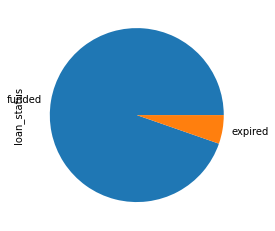

In [ ]:
dat['loan_status'].value_counts().plot(kind='pie')

In [ ]:
dat['sector_name'].value_counts()

Agriculture       436580
Food              337445
Retail            300779
Services          104932
Housing            96275
Clothing           81678
Personal Use       73158
Education          65958
Arts               33399
Transportation     32955
Health             25978
Construction       17207
Manufacturing      14141
Entertainment       1839
Wholesale           1457
Name: sector_name, dtype: int64

In [ ]:
dat[['loan_amount', 'funded_amount', 'sector_name', 'loan_status']].groupby(['sector_name', 'loan_status']).count()

loan_amount  funded_amount
sector_name    loan_status                            
Agriculture    expired            24015          24015
               funded            412565         412565
Arts           expired              273            273
               funded             33126          33126
Clothing       expired             5427           5427
               funded             76251          76251
Construction   expired              741            741
               funded             16466          16466
Education      expired              978            978
               funded             64980          64980
Entertainment  expired              171            171
               funded              1668           1668
Food           expired            15304          15304
               funded            322141         322141
Health         expired             1836           1836
               funded             24142          24142
Housing        expired             6077           6077
               funded             90198          90198
Manufacturing  expired               32             32
               funded             14109          14109
Personal Use   expired             2019           2019
               funded             71139          71139
Retail         expired            19139          19139
               funded            281640         281640
Services       expired             7019           7019
               funded             97913          97913
Transportation expired             3520           3520
               funded             29435          29435
Wholesale      expired               55             55
               funded              1402           1402

In [ ]:
dat.groupby('loan_status').mean()

,loan_id,funded_amount,loan_amount,lender_term,num_lenders_total,num_journal_entries,num_bulk_entries
loan_status,,,,,,,
expired,1.259642e+06,587.280558,1419.374812,18.185437,15.439150,1.014064,1.000820
funded,1.257758e+06,796.654220,796.654366,12.980627,21.299179,1.504781,1.134654


In [ ]:
dat['loan_amount_higher'] = np.where(dat['funded_amount'] >= dat['loan_amount'], 
                                           'yes', 'no')
dat['loan_amount_higher'].value_counts()

yes    1537178
no       86603
Name: loan_amount_higher, dtype: int64

In [ ]:
# Prepare the data for machine learning
#reduce the dataset to the features that can affect the funding of the loan
learning_data = dat[['loan_amount', 'description_translated', 'lender_term', 'sector_name', 'loan_status']]
learning_data['loan_status'] = dat.apply(lambda x: 1 if x.status == 'funded' else 0, axis=1)

learning_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,loan_amount,description_translated,lender_term,sector_name,loan_status
1,125.0,Rosa works hard to support her family. Rosa is...,8.0,Retail,1
2,175.0,Warlita is a widowed woman with two children. ...,11.0,Food,1
3,1400.0,Faafofola is a 40-year-old married woman with ...,14.0,Agriculture,1
4,425.0,"Veronique is a widow, …[text missing] years ol...",15.0,Food,1
5,325.0,Sabitu is married and lives with his family in...,19.0,Agriculture,1


In [ ]:
#learning_data.isnull().sum()

In [ ]:
#Dropping the NaN
loan_data = learning_data.dropna()
loan_data.isnull().sum()

loan_amount               0
description_translated    0
lender_term               0
sector_name               0
loan_status               0
dtype: int64

In [ ]:
loan_data.shape

(1623781, 5)

In [ ]:
loan_data_cat = loan_data[['sector_name']]
loan_data_cat.nunique()

sector_name    15
dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
loan_data_cat_1hot = cat_encoder.fit_transform(loan_data_cat)
loan_data_cat_1hot

<1623781x15 sparse matrix of type '<class 'numpy.float64'>'
	with 1623781 stored elements in Compressed Sparse Row format>

In [ ]:
loan_data_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#dat.dtypes

In [ ]:
import re
import string
import nltk
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
pd.set_option('display.max_colwidth', -1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [ ]:
# def clean_text(text):
#     # remove numbers
#     text_nonum = re.sub(r'\d+', '', text)
#     # remove punctuations and convert characters to lower case
#     text_nopunct = "".join([char.lower() for char in text_nonum if char not in string.punctuation]) 
#     # substitute multiple whitespace with single whitespace
#     # Also, removes leading and trailing whitespaces
#     text_no_doublespace = re.sub('\s+', ' ', text_nopunct).strip()
#     return text_no_doublespace
# dat['nopunct_description'] = dat['description_translated'].apply(lambda x: clean_text(x))

In [ ]:
# def remove_punct(text):
#   text = [word.lower() for word in text if word.isalpha()] 
#   return text

# dat['nopunct_description'] = dat['description'].apply(lambda x: remove_punct(x))

In [ ]:
# def tokenize(text):
#   tokens = re.split('\W+', text)
#   return tokens

In [ ]:
# def remove_stopwords(tokenzied_list):
#   text = [word for word in tokenzied_list if word not stopword]
#   return text

In [ ]:
def clean_text(text):
  text = "".join([word for word in text if word not in string.punctuation])
  tokens = re.split('\W+', text)
  text = [word for word in tokens if word not in stopword]
  return text

dat['clean_description'] = dat['description_translated'].apply(lambda x: clean_text(x.lower()))
dat.head()

In [ ]:
# Create a new column to calculate the average contribution by lenders
dat['contrib_per_lend'] = data['funded_amount'] / data['num_lenders_total']
dat['contrib_per_lend'].value_counts()

25.000000     387567
33.333333      59878
31.250000      49426
37.500000      43870
50.000000      42401
               ...  
59.068627          1
33.875000          1
196.000000         1
33.957219          1
50.295858          1
Name: contrib_per_lend, Length: 19848, dtype: int64

In [ ]:
#Create a new column for the average monthly repayment
dat['monthly_repayment'] = data['funded_amount'] / data['lender_term']
dat['monthly_repayment'].value_counts()

25.000000      85547
50.000000      49047
35.714286      43855
21.428571      40695
37.500000      38059
               ...  
439.705882         1
617.592593         1
142.567568         1
73.140496          1
2191.666667        1
Name: monthly_repayment, Length: 7493, dtype: int64

In [ ]:
#Dropping the columns that are not necessary for the model
data_reduced = dat.drop(columns=['loan_id', 'country_code', 'image_id', 'video_id', 'num_lenders_total', 'description_translated'])

In [ ]:
data_reduced.describe(include=object)

,loan_name,original_language,description,status,activity_name,sector_name,loan_use,country_name,town_name,currency_policy,currency,posted_time,planned_expiration_time,disburse_time,raised_time,tags,borrower_names,borrower_genders,borrower_pictured,repayment_interval,distribution_model
count,1936894,1940851,1940823,1977543,1977543,1977543,1940834,1977543,1819103,1977543,1977543,1977543,1610102,1977527,1977543,1056645,1936894,1940851,1940851,1977543,1977543
unique,444006,8,1936715,1,163,15,1177192,97,27976,2,78,1970459,854188,78380,1628575,203835,589032,23774,7734,3,2
top,Anonymous Group,English,"Hello Kiva Community! <br /><br />Meet Mary, w...",funded,Farming,Agriculture,to build a sanitary toilet for her family,Philippines,Kaduna,shared,PHP,2006-04-16 07:10:50.000 +0000,2018-07-20 05:35:51.000 +0000,2020-01-28 08:00:00.000 +0000,2005-03-31 06:27:55.000 +0000,user_favorite,Mary,female,true,monthly,field_partner
freq,7082,1347026,17,1977543,211372,510693,18117,437345,17178,1522902,437343,205,27,4451,202,75473,5794,1298469,1674182,1711871,1960373


In [ ]:
data_reduced.describe()

,funded_amount,loan_amount,currency_exchange_coverage_rate,partner_id,lender_term,num_journal_entries,num_bulk_entries,contrib_per_lend,monthly_repayment
count,2.079136e+06,2.079136e+06,1.608362e+06,2.058022e+06,2.079112e+06,2.079136e+06,2.079136e+06,2.075783e+06,2.079112e+06
mean,7.760711e+02,8.152243e+02,1.059521e-01,1.685655e+02,1.311601e+01,1.542729e+00,1.147883e+00,5.470357e+01,7.047902e+01
std,1.590375e+03,1.667791e+03,4.005050e-02,1.074152e+02,7.271440e+00,1.084915e+00,5.219326e-01,1.583538e+02,1.380705e+02
min,0.000000e+00,2.500000e+01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,0.000000e+00
25%,2.500000e+02,2.750000e+02,1.000000e-01,1.100000e+02,8.000000e+00,1.000000e+00,1.000000e+00,2.666667e+01,2.321429e+01
50%,4.750000e+02,5.000000e+02,1.000000e-01,1.450000e+02,1.300000e+01,1.000000e+00,1.000000e+00,3.088235e+01,3.846154e+01
75%,9.000000e+02,9.750000e+02,1.000000e-01,1.880000e+02,1.400000e+01,2.000000e+00,1.000000e+00,4.062500e+01,6.875000e+01
max,5.000000e+05,5.000000e+05,2.000000e-01,6.190000e+02,1.950000e+02,1.260000e+02,6.300000e+01,2.500000e+04,5.000000e+04


In [ ]:
# import seaborn as sns
# sns.pairplot(df1[['contrib_per_lend', 'repayment_monthly']])

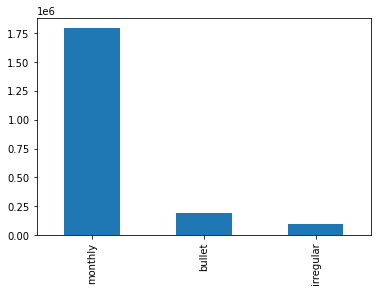

In [ ]:
data_reduced['repayment_interval'].value_counts().plot(kind='bar')

In [ ]:
data_reduced.columns

Index(['loan_name', 'original_language', 'description', 'funded_amount',
       'loan_amount', 'status', 'activity_name', 'sector_name', 'loan_use',
       'country_name', 'town_name', 'currency_policy',
       'currency_exchange_coverage_rate', 'currency', 'partner_id',
       'posted_time', 'planned_expiration_time', 'disburse_time',
       'raised_time', 'lender_term', 'num_journal_entries', 'num_bulk_entries',
       'tags', 'borrower_names', 'borrower_genders', 'borrower_pictured',
       'repayment_interval', 'distribution_model', 'loan_status',
       'contrib_per_lend', 'monthly_repayment'],
      dtype='object')

In [ ]:
#data_reduced.columns = [i.replace(' ', '_').lower() for i in df1.columns]

In [ ]:
data_reduced.isnull().sum()

loan_name                           40649
original_language                   36692
description                         36720
funded_amount                           0
loan_amount                             0
status                                  0
activity_name                           0
sector_name                             0
loan_use                            36709
country_name                            0
town_name                          158440
currency_policy                         0
currency_exchange_coverage_rate    454641
currency                                0
partner_id                          17170
posted_time                             0
planned_expiration_time            367441
disburse_time                          16
raised_time                             0
lender_term                            22
num_journal_entries                     0
num_bulk_entries                        0
tags                               920898
borrower_names                    

In [ ]:
data_reduced.loan_amount.value_counts()

200.0       97813
300.0       92751
500.0       89702
250.0       76900
225.0       74822
            ...  
13700.0         1
13650.0         1
408375.0        1
13575.0         1
29450.0         1
Name: loan_amount, Length: 623, dtype: int64

In [ ]:
data_reduced.funded_amount.value_counts()

200.0      101385
300.0       94629
500.0       86756
250.0       80010
225.0       78038
            ...  
20275.0         1
3965.0          1
20500.0         1
20625.0         1
2035.0          1
Name: funded_amount, Length: 772, dtype: int64

In [ ]:
data_reduced['status'].value_counts()

funded      1977543
expired       92411
refunded       9182
Name: status, dtype: int64

In [ ]:
data_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2079136 entries, 0 to 2086699
Data columns (total 31 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   loan_name                        object 
 1   original_language                object 
 2   description                      object 
 3   funded_amount                    float64
 4   loan_amount                      float64
 5   status                           object 
 6   activity_name                    object 
 7   sector_name                      object 
 8   loan_use                         object 
 9   country_name                     object 
 10  town_name                        object 
 11  currency_policy                  object 
 12  currency_exchange_coverage_rate  float64
 13  currency                         object 
 14  partner_id                       float64
 15  posted_time                      object 
 16  planned_expiration_time          object 
 17  disburse

In [ ]:
data_reduced.repayment_interval.value_counts()

monthly      1794909
bullet        190546
irregular      93681
Name: repayment_interval, dtype: int64

In [ ]:
data_reduced.lender_term.value_counts()

14.0     525364
8.0      406524
7.0      123562
11.0     123420
6.0       99524
          ...  
148.0         1
147.0         1
119.0         1
117.0         1
116.0         1
Name: lender_term, Length: 153, dtype: int64

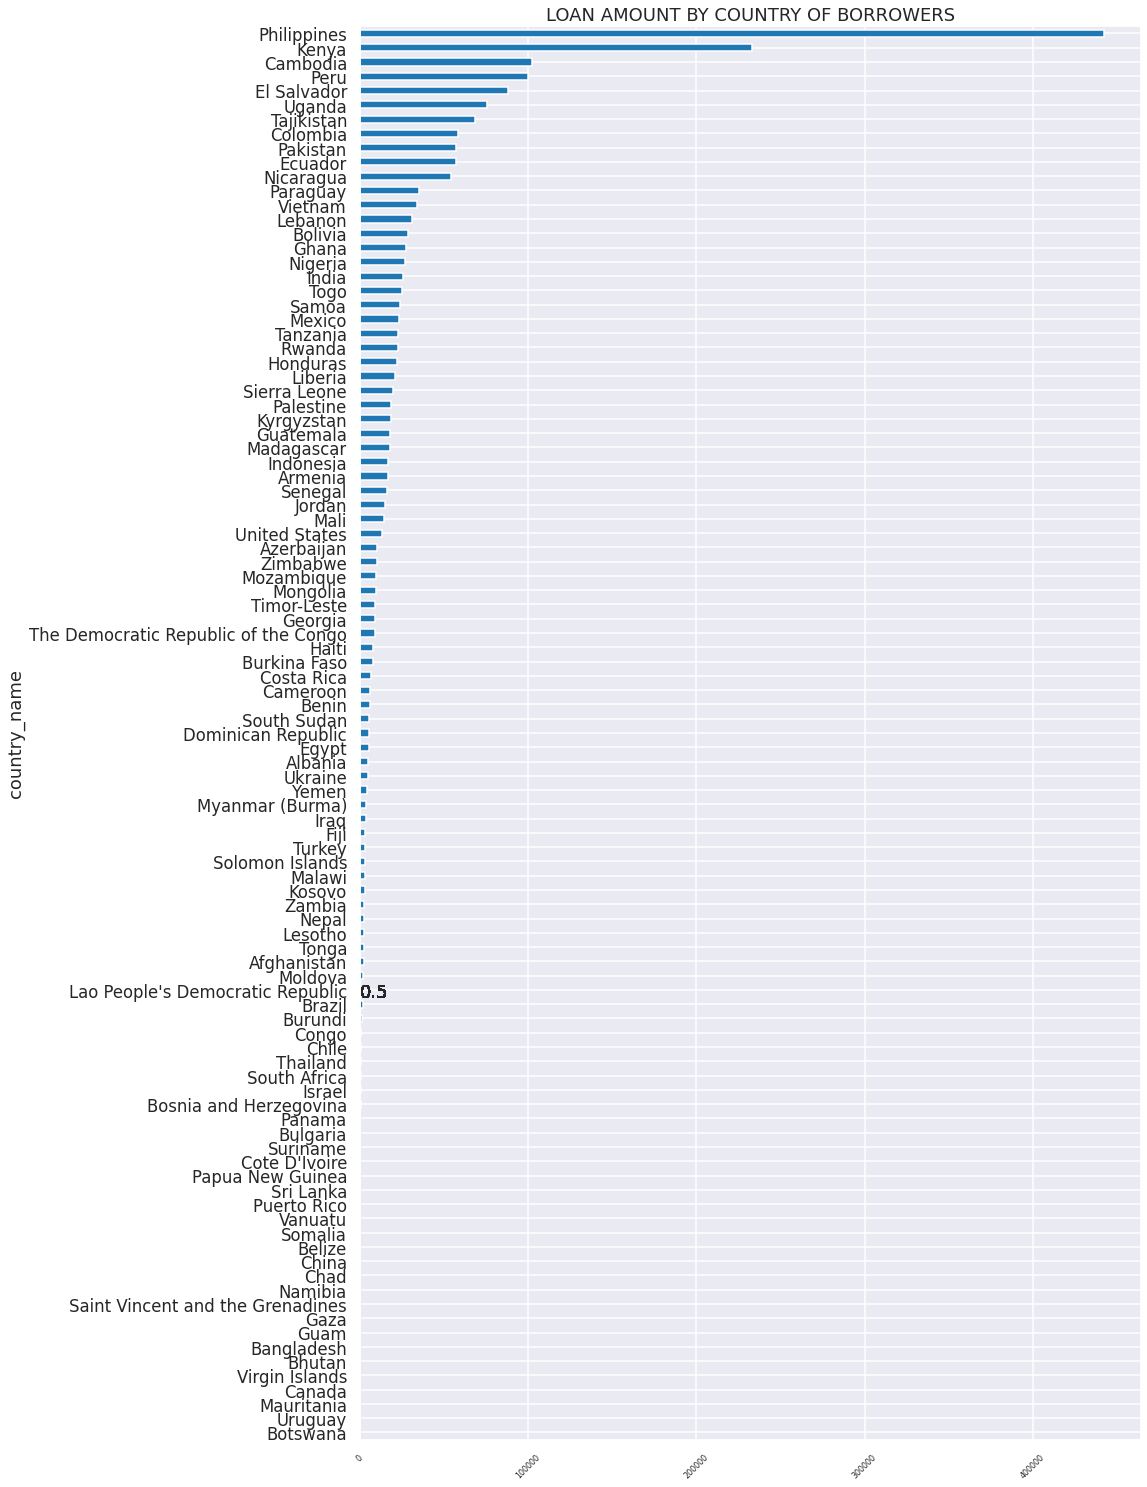

In [ ]:
#loans
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline

sns.set_style('darkgrid')
sns.set_context('talk')
plt.figure(figsize=(14,26))
df_sorted = data_reduced.groupby('country_name')['loan_amount'].count().sort_values()
ax = df_sorted.plot.barh()
#ax = df1.groupby('COUNTRY_CODE')['LOAN_AMOUNT'].count().plot.barh()
plt.title('LOAN AMOUNT BY COUNTRY OF BORROWERS')
plt.xticks(fontsize = 8,rotation=45)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()-0.1, p.get_height()+30))


In [ ]:
data_num = data_reduced[['funded_amount', 'loan_amount', 'currency_exchange_coverage_rate', 'partner_id', 'lender_term', 'contrib_per_lend', 'monthly_repayment', 'num_journal_entries', 'num_bulk_entries']]


In [ ]:
def ames_eda(data_num): 
    eda_df = {}
    eda_df['null_sum'] = data_num.isnull().sum()
    eda_df['null_pct'] = data_num.isnull().mean()
    eda_df['dtypes'] = data_num.dtypes
    eda_df['count'] = data_num.count()
    eda_df['mean'] = data_num.mean()
    eda_df['median'] = data_num.median()
    eda_df['min'] = data_num.min()
    eda_df['max'] = data_num.max()
    
    return pd.DataFrame(eda_df)
ames_eda(data_num)

,null_sum,null_pct,dtypes,count,mean,median,min,max
funded_amount,0,0.000000,float64,2079136,776.071116,475.000000,0.0,500000.0
loan_amount,0,0.000000,float64,2079136,815.224257,500.000000,25.0,500000.0
currency_exchange_coverage_rate,470774,0.226428,float64,1608362,0.105952,0.100000,0.0,0.2
partner_id,21114,0.010155,float64,2058022,168.565458,145.000000,1.0,619.0
lender_term,24,0.000012,float64,2079112,13.116013,13.000000,1.0,195.0
contrib_per_lend,3353,0.001613,float64,2075783,54.703569,30.882353,5.0,25000.0
monthly_repayment,24,0.000012,float64,2079112,70.479023,38.461538,0.0,50000.0
num_journal_entries,0,0.000000,int64,2079136,1.542729,1.000000,1.0,126.0
num_bulk_entries,0,0.000000,int64,2079136,1.147883,1.000000,1.0,63.0


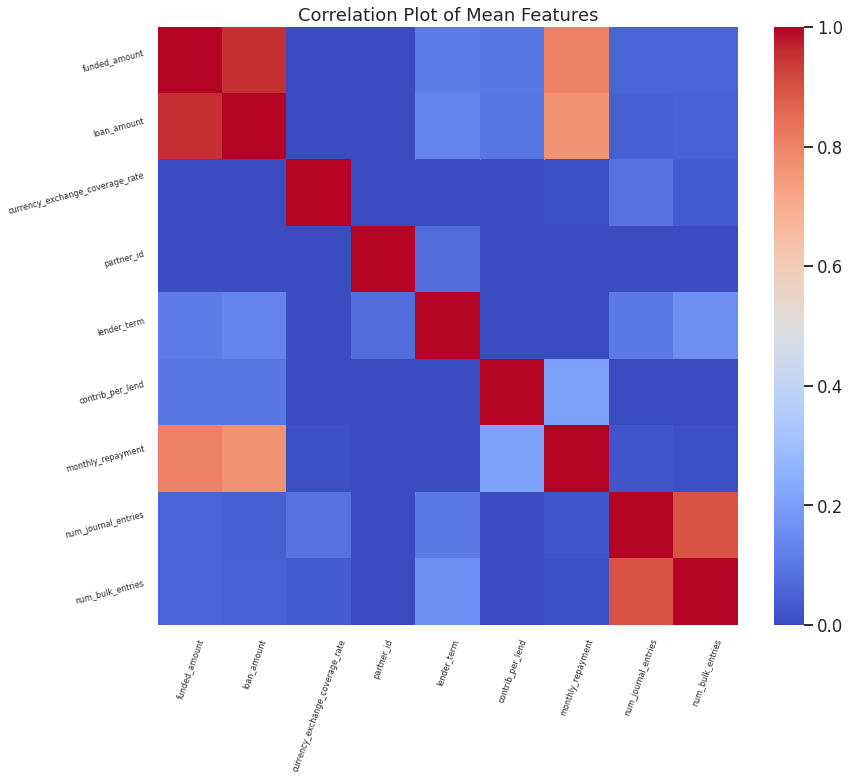

In [ ]:
mean_corr = data_num.corr()
fig=plt.figure(figsize=(13,11))
g1 = sns.heatmap(mean_corr, cmap='coolwarm', vmin=0, vmax=1)
g1.set_xticklabels(g1.get_xticklabels(), rotation=70, fontsize=8)
g1.set_yticklabels(g1.get_yticklabels(), rotation=15, fontsize=8)
plt.title("Correlation Plot of Mean Features")
plt.savefig("Corr_Mean_Features.png", dpi=200)
plt.show()

In [ ]:
# attributes = ['funded_amount', 'loan_amount', 'currency_exchange_coverage_rate', 'partner_id', 'lender_term',
#                'num_lenders_total', 'num_journal_entries', 'num_bulk_entries']
# def histograms_numeric_columns(df1_num, attributes):
#     '''
#     Takes df, numerical columns as list
#     Returns a group of histagrams
#     '''
#     f = pd.melt(df1_num, value_vars=attributes) 
#     g = sns.FacetGrid(f, col='variable',  col_wrap=2, sharex=False, sharey=False)
#     g = g.map(sns.distplot, 'value')
#     return g

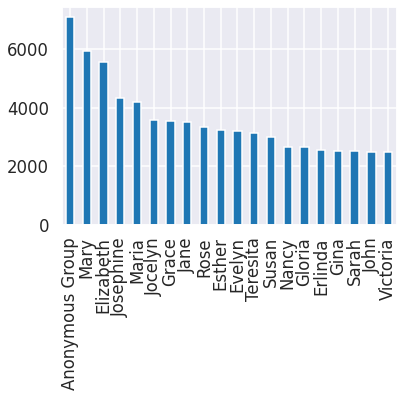

In [ ]:
d = data_reduced['loan_name'].value_counts()[0:20]
d.plot(kind='bar')

In [ ]:
#Create a new column that shows the repayment status( 1 = irregular payment and 0 = payment on time)
data_reduced['repayment_status'] = data_reduced.apply(lambda x: 1 if x['repayment_interval'] =='irregular' else 0, axis=1)

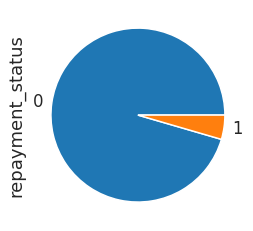

In [ ]:
data_reduced['repayment_status'].value_counts().plot(kind='pie')

In [ ]:
data_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2079136 entries, 0 to 2086699
Data columns (total 32 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   loan_name                        object 
 1   original_language                object 
 2   description                      object 
 3   funded_amount                    float64
 4   loan_amount                      float64
 5   status                           object 
 6   activity_name                    object 
 7   sector_name                      object 
 8   loan_use                         object 
 9   country_name                     object 
 10  town_name                        object 
 11  currency_policy                  object 
 12  currency_exchange_coverage_rate  float64
 13  currency                         object 
 14  partner_id                       float64
 15  posted_time                      object 
 16  planned_expiration_time          object 
 17  disburse

In [ ]:
data_clean = data_reduced[['loan_name', 'funded_amount','loan_amount','currency_exchange_coverage_rate', 'partner_id','lender_term', 'num_journal_entries', 'num_bulk_entries', 'contrib_per_lend','monthly_repayment', 'repayment_status']]


In [ ]:
# check scikit-learn version
import sklearn
print(sklearn.__version__)

0.22.2.post1


In [ ]:
import pandas as pd
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.graph_objects as go
#df_stocks = px.data.stocks()
px.line(data_reduced, x='raised_time', y='loan_amount')

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/New Folder/lenders.csv')
df2.head()

,PERMANENT_NAME,DISPLAY_NAME,MAIN_PIC_ID,CITY,STATE,COUNTRY_CODE,MEMBER_SINCE,PERSONAL_URL,OCCUPATION,LOAN_BECAUSE,OTHER_INFO,LOAN_PURCHASE_NUM,INVITED_BY,NUM_INVITED
0,julie70699492,Julie,NaN,NaN,NaN,NaN,1613601597,NaN,NaN,NaN,NaN,1,NaN,0
1,milo6882,Milo Re,NaN,NaN,NaN,NaN,1614018683,NaN,NaN,NaN,NaN,1,NaN,0
2,dionysios2219,dionysios,NaN,NaN,NaN,NaN,1613694450,NaN,NaN,NaN,NaN,1,NaN,0
3,simon85818350,Simon Re,NaN,NaN,NaN,NaN,1614018664,NaN,NaN,NaN,NaN,1,NaN,0
4,miky1853,Miky,NaN,NaN,NaN,NaN,1613595408,NaN,NaN,NaN,NaN,1,NaN,0


In [ ]:
df2.isnull().sum()

PERMANENT_NAME             0
DISPLAY_NAME            1596
MAIN_PIC_ID          1044640
CITY                 1016056
STATE                1051403
COUNTRY_CODE          894070
MEMBER_SINCE               0
PERSONAL_URL         1512517
OCCUPATION           1224118
LOAN_BECAUSE         1409167
OTHER_INFO           1473473
LOAN_PURCHASE_NUM          0
INVITED_BY           1145612
NUM_INVITED                0
dtype: int64

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1561255 entries, 0 to 1561254
Data columns (total 14 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   PERMANENT_NAME     1561255 non-null  object 
 1   DISPLAY_NAME       1559659 non-null  object 
 2   MAIN_PIC_ID        516615 non-null   float64
 3   CITY               545199 non-null   object 
 4   STATE              509852 non-null   object 
 5   COUNTRY_CODE       667185 non-null   object 
 6   MEMBER_SINCE       1561255 non-null  int64  
 7   PERSONAL_URL       48738 non-null    object 
 8   OCCUPATION         337137 non-null   object 
 9   LOAN_BECAUSE       152088 non-null   object 
 10  OTHER_INFO         87782 non-null    object 
 11  LOAN_PURCHASE_NUM  1561255 non-null  int64  
 12  INVITED_BY         415643 non-null   object 
 13  NUM_INVITED        1561255 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 166.8+ MB


In [ ]:
df1['SECTOR_NAME'].value_counts()

Agriculture       541946
Food              459380
Retail            399877
Services          141725
Clothing          111880
Housing           106823
Personal Use       80290
Education          73149
Transportation     49600
Arts               41596
Health             29773
Construction       24767
Manufacturing      20687
Entertainment       2625
Wholesale           2582
Name: SECTOR_NAME, dtype: int64